# Importing Required Libraries for Data Preparation 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset and Examining Structure

In [3]:
df = pd.read_csv('data/gritdata.csv', delimiter = '\t')
df.head()
# changed delimiter to tab

,country,surveyelapse,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,...,O7,O8,O9,O10,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,RO,174,1,1,3,3,3,2,3,1,...,5,4,5,4,Windows,Chrome,1366,768,69590,307
1,US,120,2,2,3,3,2,1,3,3,...,4,3,4,5,Macintosh,Chrome,1280,800,33657,134
2,US,99,3,3,3,3,4,3,4,4,...,5,5,4,4,Windows,Firefox,1920,1080,95550,138
3,KE,5098,1,3,4,2,4,1,5,4,...,4,2,5,4,Windows,Chrome,1600,900,4,4440
4,JP,340,1,2,3,3,2,2,2,4,...,4,1,3,2,Windows,Firefox,1920,1080,3,337


In [4]:
df.shape
# (row, col)

(4270, 98)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 98 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          4226 non-null   object
 1   surveyelapse     4270 non-null   int64 
 2   GS1              4270 non-null   int64 
 3   GS2              4270 non-null   int64 
 4   GS3              4270 non-null   int64 
 5   GS4              4270 non-null   int64 
 6   GS5              4270 non-null   int64 
 7   GS6              4270 non-null   int64 
 8   GS7              4270 non-null   int64 
 9   GS8              4270 non-null   int64 
 10  GS9              4270 non-null   int64 
 11  GS10             4270 non-null   int64 
 12  GS11             4270 non-null   int64 
 13  GS12             4270 non-null   int64 
 14  VCL1             4270 non-null   int64 
 15  VCL2             4270 non-null   int64 
 16  VCL3             4270 non-null   int64 
 17  VCL4             4270 non-null   

## Validity Check + Filtering

In [6]:
df = df[~((df["VCL6"]==1) | (df["VCL9"]==1) | (df["VCL12"]==1))]
# filtering out rows that are true (value == 1) in cols: VCL6, VCL9, VCL12

The validity check has been performed and the VCL columns are no longer required. I will remove them VCL6, VCL9, VCL12 but keep the rest just in case good vocabulary is an indicator of grit.

In [7]:
df = df.drop(columns = ["VCL6", "VCL9", "VCL12"])

### Filtering Survey Timing Data
Removing rows with unreasonable survey completion times:
- testelapse: 75-2000 seconds (too fast indicates careless responding, too slow indicates interruptions)
- introelapse: 0-800 seconds 
- surveyelapse: 72-2000 seconds

In [16]:
# Check how many rows fall outside acceptable timing ranges
print("Rows outside bounds:")
print(f"75 < testelapse < 2000: {((df['testelapse'] < 75) | (df['testelapse'] > 2000)).sum()}")
print(f"0 < introelapse < 800: {((df['introelapse'] < 0) | (df['introelapse'] > 800)).sum()}")
print(f"72 < surveyelapse < 2000: {((df['surveyelapse'] < 72) | (df['surveyelapse'] > 2000)).sum()}")
print(f"\nCurrent shape: {df.shape}")

Rows outside bounds:
75 < testelapse < 2000: 0
0 < introelapse < 800: 0
72 < surveyelapse < 2000: 0

Current shape: (3003, 95)


In [15]:
# Filter rows based on timing bounds
df = df[(df['testelapse'] >= 75) & (df['testelapse'] <= 2000) &
        (df['introelapse'] >= 0) & (df['introelapse'] <= 800) &
        (df['surveyelapse'] >= 72) & (df['surveyelapse'] <= 2000)]

In [17]:
# Verify filtering results
print(f"New shape after timing filter: {df.shape}")
print(f"\nUpdated timing statistics:")
print(df[["introelapse", "testelapse", "surveyelapse"]].describe())

New shape after timing filter: (3003, 95)

Updated timing statistics:
       introelapse   testelapse  surveyelapse
count  3003.000000  3003.000000   3003.000000
mean     38.064269   267.752248    232.262071
std      89.487635   173.386255    147.288365
min       1.000000    77.000000     72.000000
25%       5.000000   170.000000    148.000000
50%      10.000000   221.000000    194.000000
75%      28.000000   299.500000    262.000000
max     784.000000  1819.000000   1991.000000


In [309]:
df.duplicated().sum()

np.int64(0)

There are no duplicates in our data.

In [310]:
df.isna().sum()

country         33
surveyelapse     0
GS1              0
GS2              0
GS3              0
                ..
browser          0
screenw          0
screenh          0
introelapse      0
testelapse       0
Length: 95, dtype: int64

44 rows in the data have null values in the column "country". We will fill these null values with a placeholder value, "Unknown" so we can retain other information.

In [311]:
df['country'] = df['country'].fillna("Unknown")

In [312]:
df.isna().sum().sum()
# checking if there are any remaining null values 

np.int64(0)

In [313]:
# this demographics dataframe DOES NOT include familysize and age since its information 
# was collected differently by the user
demographics = ["education", "urban", "gender", "engnat", "hand", "religion", "orientation", 
"race", "voted", "married"]
demographics_df = df[demographics]
demographicZeroCount = (demographics_df == 0).sum()
print(demographicZeroCount)

education      24
urban          31
gender          3
engnat         16
hand           11
religion       46
orientation    95
race           22
voted          29
married        17
dtype: int64


A value marked 0 will be considered 'Unknown'.

<Axes: xlabel='age'>

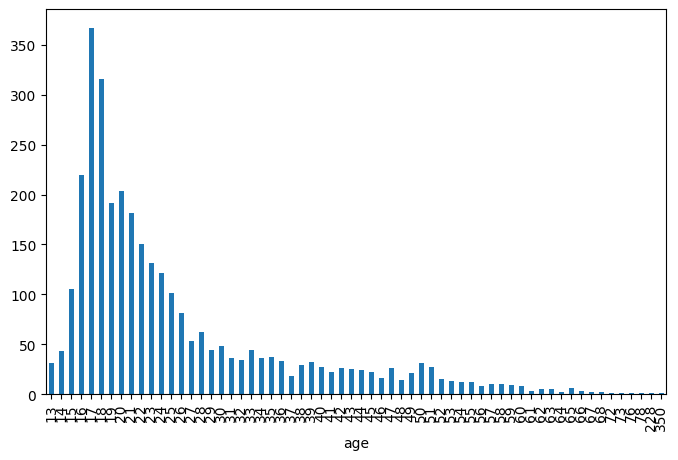

In [314]:
df['age'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

Here with our age column, we find two outliers, users who inserted their ages as 228 and 350. We will remove those rows.

In [315]:
df = df[~((df["age"]==228) | (df["age"]==350))]

<Axes: xlabel='familysize'>

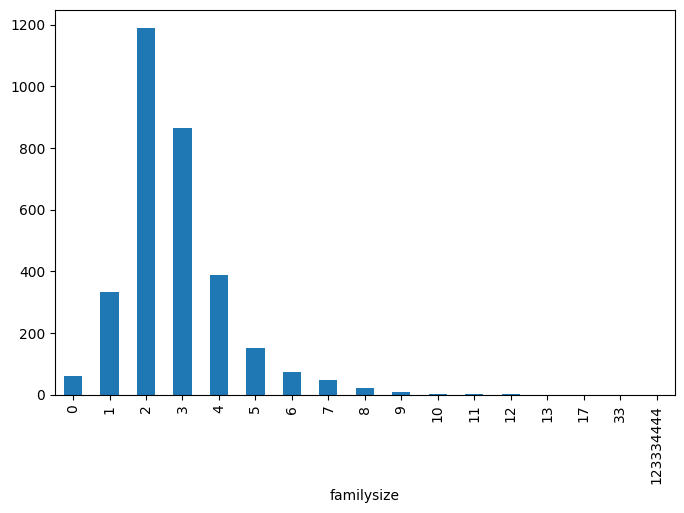

In [316]:
df['familysize'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

Here with our familysize column, we find a couple of outliers. Like the age column, we will remove those outlier rows.

In [317]:
df = df[~((df["familysize"]==0) | (df["familysize"]==123334444) | (df["familysize"]==33))]

In [318]:
# getting the columns of gritScore cols (GS1-GS12)
gritColumns = df.iloc[:,2:14].columns
print(gritColumns)

Index(['GS1', 'GS2', 'GS3', 'GS4', 'GS5', 'GS6', 'GS7', 'GS8', 'GS9', 'GS10',
       'GS11', 'GS12'],
      dtype='object')


In [319]:
# summing up the count of all missing data from Grit Scores
GritScoreZeroCount = (df[gritColumns] == 0).sum()
print(GritScoreZeroCount)

GS1      7
GS2      7
GS3      8
GS4     22
GS5      7
GS6      9
GS7      9
GS8      5
GS9      5
GS10     9
GS11     8
GS12    16
dtype: int64


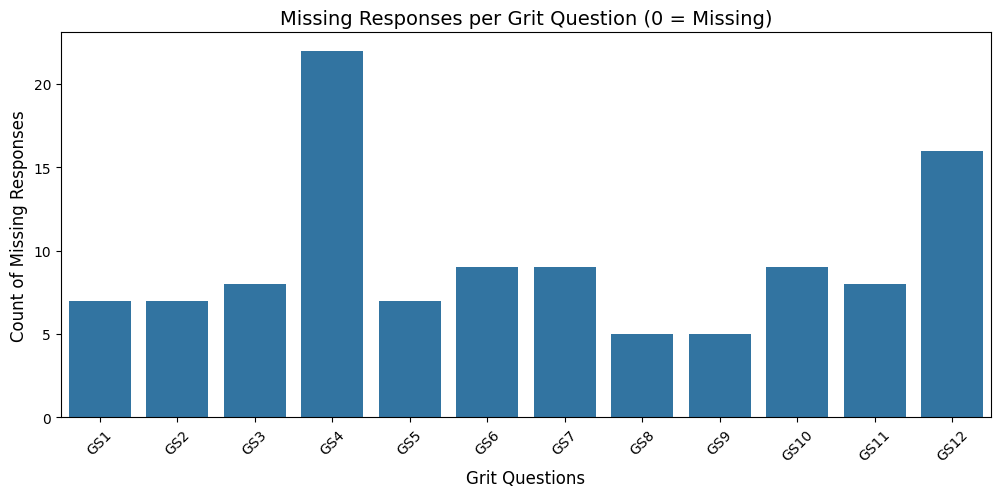

In [320]:
plt.figure(figsize=(12,5))
sns.barplot(x=GritScoreZeroCount.index, y=GritScoreZeroCount.values)
plt.title("Missing Responses per Grit Question (0 = Missing)", fontsize=14)
plt.xlabel("Grit Questions", fontsize=12)
plt.ylabel("Count of Missing Responses", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Thesee are the amount of missing grit scores

In [321]:
# getting the columns of the Big 5 Personality Test 
bigPersonalities = [col for col in df.columns if col.startswith(("E", "N", "A", "C", "O"))]
print(bigPersonalities)
#columns=[col for col in df.columns if col.startswith("VCL")]

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10']


In [322]:
# summing up the count of all missing data from Big 5 Personality Test
bigPersonalitiesZeroCount = (df[bigPersonalities] == 0).sum()
print(bigPersonalitiesZeroCount)

E1      7
E2      8
E3      9
E4     15
E5     16
E6      5
E7     18
E8      4
E9      6
E10     4
N1      7
N2     10
N3      7
N4     11
N5      6
N6     12
N7     10
N8      9
N9      6
N10    11
A1     10
A2      8
A3      8
A4     11
A5      9
A6     12
A7      5
A8      6
A9      5
A10    12
C1     10
C2      9
C3      5
C4     13
C5     10
C6     11
C7      9
C8     12
C9      8
C10    14
O1      6
O2     14
O3     11
O4     12
O5      9
O6     14
O7     10
O8      9
O9      9
O10    13
dtype: int64


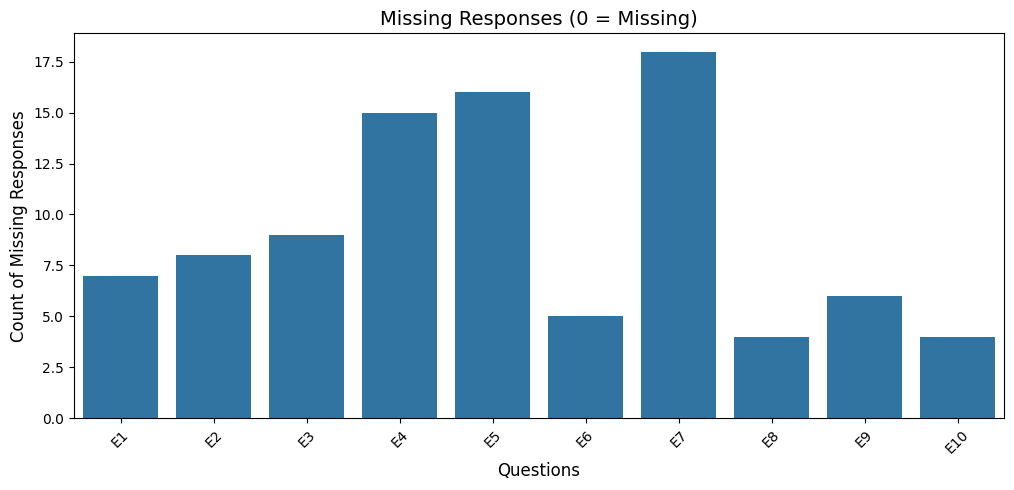

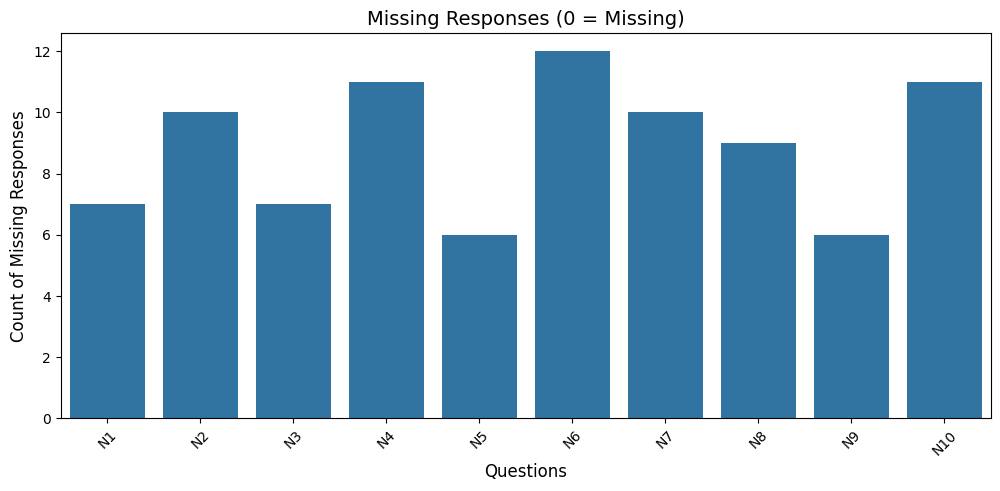

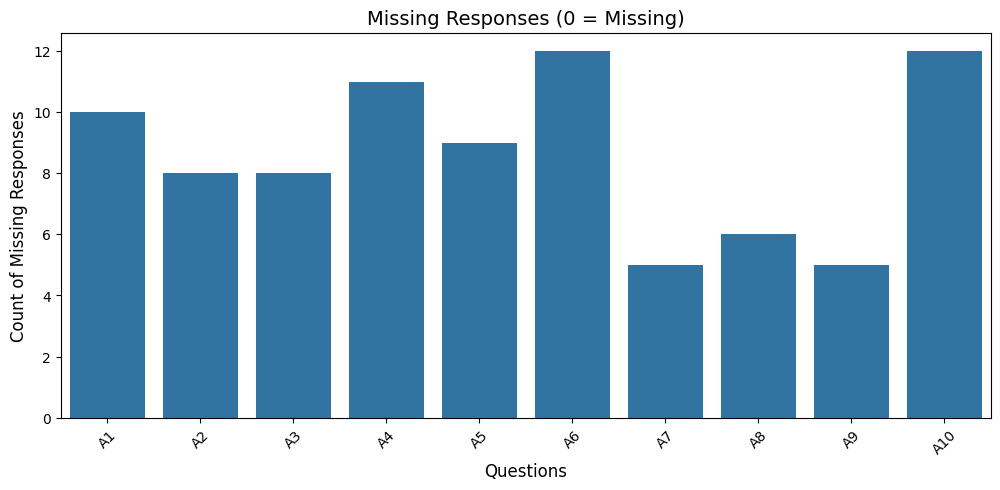

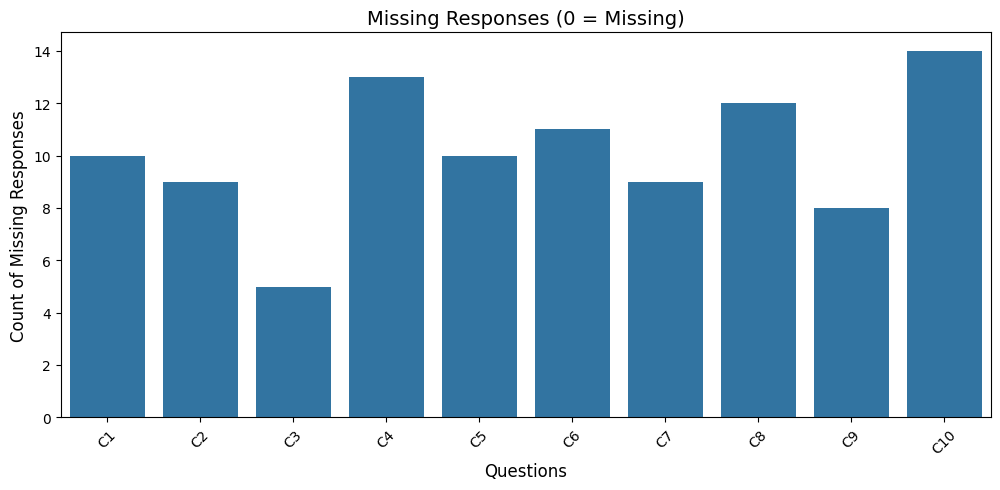

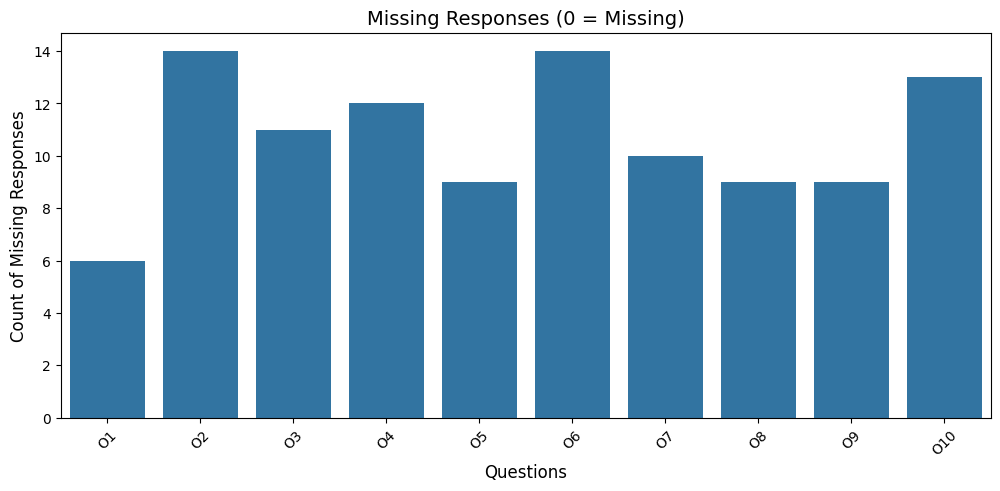

In [323]:
for i in range(0, 50, 10):
    current = bigPersonalitiesZeroCount.iloc[i: i+10]
    plt.figure(figsize=(12,5))
    sns.barplot(x=current.index, y=current.values)
    plt.title("Missing Responses (0 = Missing)", fontsize=14)
    plt.xlabel("Questions", fontsize=12)
    plt.ylabel("Count of Missing Responses", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

## Completeness Check 

In [324]:
completeness = (df != 0).sum() / (len(df))

completeness_df = pd.DataFrame({
    'BigPersonalities': bigPersonalitiesZeroCount,
    'GritScore': GritScoreZeroCount, 
    'MissingCountries': (df['country'] == 'Unknown').sum(),
    'NonMissingCounts': (df != 0).sum(),
    'CompletenessRate': completeness.round(3)
})

In [325]:
completeness_df[completeness_df['GritScore'].notna()]

,BigPersonalities,GritScore,MissingCountries,NonMissingCounts,CompletenessRate
GS1,NaN,7.0,31,3089,0.998
GS10,NaN,9.0,31,3087,0.997
GS11,NaN,8.0,31,3088,0.997
GS12,NaN,16.0,31,3080,0.995
GS2,NaN,7.0,31,3089,0.998
GS3,NaN,8.0,31,3088,0.997
GS4,NaN,22.0,31,3074,0.993
GS5,NaN,7.0,31,3089,0.998
GS6,NaN,9.0,31,3087,0.997
GS7,NaN,9.0,31,3087,0.997


### Filling in zero values with median values within that column and we are not using mean to avoid outliers

In [326]:
print(int(df['GS1'].median()))

2


In [327]:
for i in GritScoreZeroCount.index:
    value = int(df[i].median())
    df[i] = df[i].replace(0, value)

In [328]:
GritScoreZeroCount = (df[gritColumns] == 0).sum()
print(GritScoreZeroCount)

GS1     0
GS2     0
GS3     0
GS4     0
GS5     0
GS6     0
GS7     0
GS8     0
GS9     0
GS10    0
GS11    0
GS12    0
dtype: int64


In [329]:
for i in bigPersonalitiesZeroCount.index:
    value = int(df[i].median())
    df[i] = df[i].replace(0, value)

In [330]:
bigPersonalitiesZeroCount = (df[bigPersonalities] == 0).sum()
print(bigPersonalitiesZeroCount)

E1     0
E2     0
E3     0
E4     0
E5     0
E6     0
E7     0
E8     0
E9     0
E10    0
N1     0
N2     0
N3     0
N4     0
N5     0
N6     0
N7     0
N8     0
N9     0
N10    0
A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
C1     0
C2     0
C3     0
C4     0
C5     0
C6     0
C7     0
C8     0
C9     0
C10    0
O1     0
O2     0
O3     0
O4     0
O5     0
O6     0
O7     0
O8     0
O9     0
O10    0
dtype: int64


In [331]:
print(df["operatingsystem"].value_counts())
print(df["browser"].value_counts())
print(df[["screenw", "screenh"]].describe())
print(df[["introelapse", "testelapse", "surveyelapse"]].describe())

operatingsystem
Windows          1856
Macintosh         478
iOS               402
Linux             278
ChromeOS           63
Unknown            15
Windows Phone       3
Blackberry          1
Name: count, dtype: int64
browser
Chrome                         1633
Safari                          580
Microsoft Internet Explorer     388
Firefox                         362
AndroidBrowser                   45
Opera                            33
Unknown                          29
ChromeiOS                        23
UCBrowser                         2
SeaMonkey                         1
Name: count, dtype: int64
           screenw      screenh
count  3096.000000  3096.000000
mean   1242.224483   841.978036
std     446.728355   174.837568
min       0.000000     0.000000
25%    1024.000000   768.000000
50%    1366.000000   800.000000
75%    1440.000000  1024.000000
max    3440.000000  1920.000000
         introelapse     testelapse  surveyelapse
count    3096.000000    3096.000000   3096.000000


Since there are missing values in screenw and screenh and the two are unlikely to be strong predictors, I will remove the columns. I will also be removing rows with unreasonable timings.

In [332]:
df = df.drop(columns = ["screenw", "screenh"])

(array([7.800e+01, 1.528e+03, 9.160e+02, 3.010e+02, 1.090e+02, 5.900e+01,
        3.700e+01, 1.700e+01, 9.000e+00, 1.200e+01, 1.000e+00, 5.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
        2700., 2800., 2900., 3000., 3100., 3200., 3300., 3400., 3500.,
        3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
        4500., 4600.,

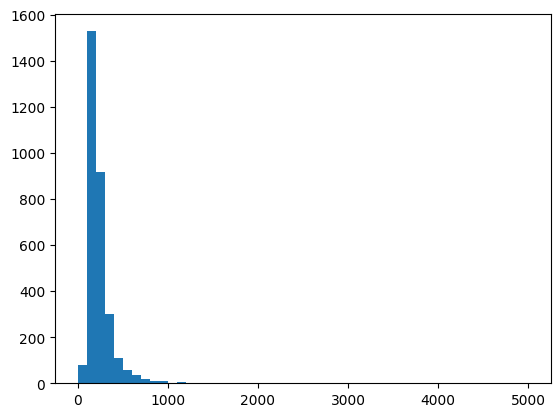

In [333]:
plt.hist(df["surveyelapse"], bins=50, range=(0,5000)) 

(array([1.987e+03, 4.050e+02, 1.820e+02, 1.070e+02, 5.800e+01, 3.800e+01,
        2.300e+01, 2.200e+01, 1.700e+01, 1.900e+01, 1.100e+01, 1.100e+01,
        5.000e+00, 1.000e+01, 1.000e+01, 8.000e+00, 7.000e+00, 2.000e+00,
        4.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        3.000e+00, 5.000e+00, 1.000e+00, 6.000e+00, 2.000e+00, 1.000e+00,
        4.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 6.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
         900.,  920.,

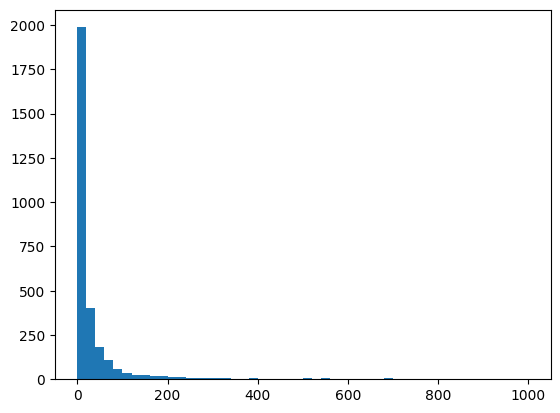

In [334]:
plt.hist(df["introelapse"], bins=50, range=(0,1000)) 

(array([  3.,   4.,  92., 498., 623., 550., 375., 249., 172., 106.,  87.,
         48.,  37.,  43.,  34.,  23.,  18.,  16.,  10.,   9.,  11.,   5.,
          6.,   8.,   3.,   2.,   3.,   1.,   5.,   0.,   1.,   1.,   3.,
          4.,   2.,   1.,   1.,   2.,   1.,   0.,   0.,   1.,   0.,   0.,
          1.,   2.,   0.,   0.,   1.,   0.]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  960., 1000., 1040.,
        1080., 1120., 1160., 1200., 1240., 1280., 1320., 1360., 1400.,
        1440., 1480., 1520., 1560., 1600., 1640., 1680., 1720., 1760.,
        1800., 1840., 1880., 1920., 1960., 2000.]),
 <BarContainer object of 50 artists>)

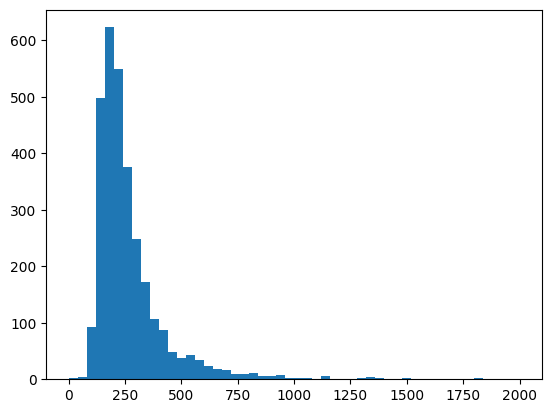

In [335]:
plt.hist(df["testelapse"], bins=50, range=(0,2000)) 

Will decide on the timing thing later with the help of others. Unsure what to do. Lots of unreasonably long times for all three but usure of cutoff. Seems to be some unreasonably short times for testelapes such as 7 seconds for 50 questions. Also unsure of a cutoff for this.

Will reverse the scores of negatively worded survey questions and then create columns for composite personality and grit scores.

In [336]:
reverse_items = ["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6", "GS2", "GS3", "GS5", "GS7", "GS8", "GS11"]
df[reverse_items] = 6 - df[reverse_items]

In [337]:
extraversion_items = ["E1","E2","E3","E4","E5","E6","E7","E8","E9","E10"]
neuroticism_items = ["N1","N2","N3","N4","N5","N6","N7","N8","N9","N10"]
agreeableness_items = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10"]
conscientious_items = ["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10"]
openness_items = ["O1","O2","O3","O4","O5","O6","O7","O8","O9","O10"]
grit_items = ["GS1", "GS2", "GS3", "GS4", "GS5", "GS6", "GS7", "GS8", "GS9", "GS10", "GS11", "GS12"]

df["Extraversion"] = df[extraversion_items].mean(axis=1)
df["Neuroticism"] = df[neuroticism_items].mean(axis=1)
df["Agreeableness"] = df[agreeableness_items].mean(axis=1)
df["Conscientiousness"] = df[conscientious_items].mean(axis=1)
df["Openness"] = df[openness_items].mean(axis=1)
df["Grit"] = df[grit_items].mean(axis=1)

In [340]:
df.shape

(3096, 99)